In [5]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
import numpy as np
from qiskit import compile
from qiskit.tools.visualization import plot_histogram
# Loading your IBM Q account(s)
#IBMQ.load_accounts()

In [6]:
M= 15
a = 11
print("a**2: ", a*a % M)

a**2:  1


In [9]:
def oneQbitCircuit(p, w, c):
    circuit = QuantumCircuit(w,p,c)
    # Prepare initial state 1 in primary register
    circuit.x(p[0])
    circuit.barrier(p)
    circuit.barrier(w)
    # Add Hadamard gate to working register
    circuit.h(w[0])
    # Add conditional multiplication by a to primary register
    circuit.cx(w[0], p[1])
    circuit.cx(w[0], p[3])
    return circuit

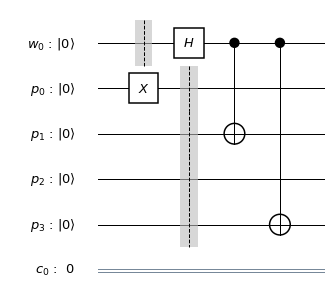

In [15]:
p = QuantumRegister(4,"p")
w = QuantumRegister(1,"w")
c = ClassicalRegister(1, "c")
circuit = oneQbitCircuit(p,w,c)
circuit.draw(output='mpl')

In [16]:
def threeQbitCircuit(p, w, c):
    circuit = QuantumCircuit(w,p, c)
    # Prepare initial state 1 in primary register
    circuit.x(p[0])
    circuit.barrier(p)
    circuit.barrier(w)
    # Add Hadamard gates to working register
    circuit.h(w[0])
    circuit.h(w[1])
    circuit.h(w[2])
    # Add conditional multiplication by a to primary register
    circuit.cx(w[0], p[1])
    circuit.cx(w[0], p[3])
    return circuit

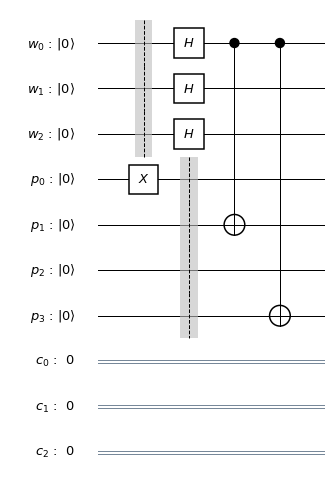

In [17]:
p = QuantumRegister(4,"p")
w = QuantumRegister(3,"w")
c = ClassicalRegister(3, "c")
circuit = threeQbitCircuit(p,w,c)
circuit.draw(output='mpl')

In [19]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
state = np.around(job.result().get_statevector(), 2)
for i in range(2**7):
    if (state[i] != 0):
        print("|",i,"> = |", i // 8, ">|", i % 8,"> ---> ", state[i])

| 8 > = | 1 >| 0 > --->  (0.35+0j)
| 10 > = | 1 >| 2 > --->  (0.35+0j)
| 12 > = | 1 >| 4 > --->  (0.35+0j)
| 14 > = | 1 >| 6 > --->  (0.35+0j)
| 89 > = | 11 >| 1 > --->  (0.35+0j)
| 91 > = | 11 >| 3 > --->  (0.35+0j)
| 93 > = | 11 >| 5 > --->  (0.35+0j)
| 95 > = | 11 >| 7 > --->  (0.35+0j)


In [22]:
def nBitQFT(q,c,n=3):
    circuit = QuantumCircuit(q,c)
    #
    # We start with the most significant bit
    #
    for k in range(n):
        j = n - k
        # Add the Hadamard to qubit j-1
        circuit.h(q[j-1])
        #
        # there is one conditional rotation for
        # each qubit with lower significance
        for i in reversed(range(j-1)):
            circuit.cu1(2*np.pi/2**(j-i),q[i], q[j-1])
        #
    # Finally we need to swap qubits
    #
    for i in range(n//2):
        circuit.swap(q[i], q[n-i-1])
    return circuit

In [23]:
circuit = threeQbitCircuit(p,w,c) + nBitQFT(w,c,n=3)
circuit.barrier(w)
circuit.measure(w,c)

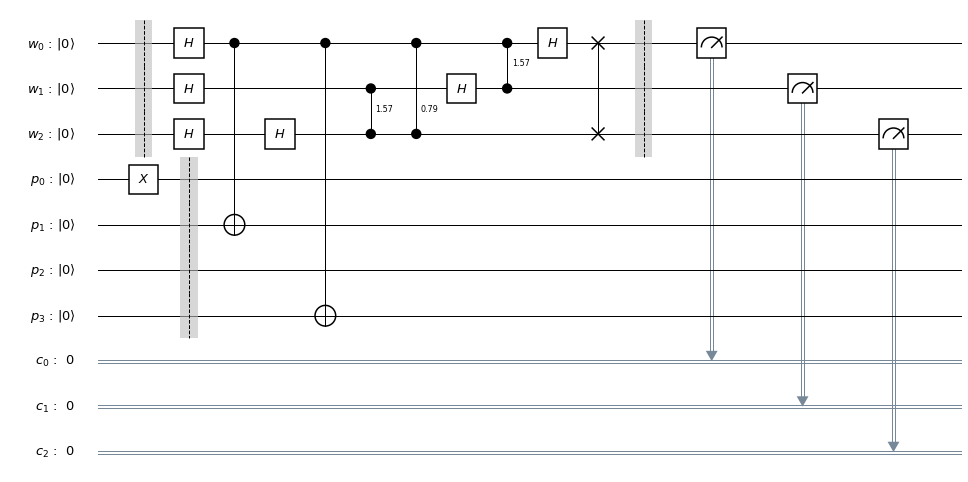

In [24]:
circuit.draw(output='mpl')

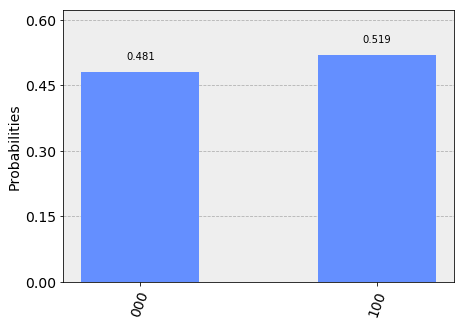

In [25]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
counts = job.result().get_counts()
plot_histogram(counts)